In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1) Importing the dataset and exploring basic info like nulls and datatypes of the dataset.**

In [10]:
df = pd.read_csv("Titanic-Dataset.csv")

print(df) # Shows the dataset

print(df.info()) # Shows the data types and non - null counts

print(df.isnull().sum()) # Checks the number of missing values in the columns of the dataset


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## **2) Handling missing values in the dataset.**

In [11]:
# For "Age" column

df["Age"] = df["Age"].fillna(df["Age"].median())

# For "Cabin" column

df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])

# For "Embarked" column

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## **3) Converting categorical features into numerical using encoding.**

In [12]:
print(df.dtypes) # We'll first check what columns are the categorical features in the dataset

# Applying encoding

df["Sex"] = df["Sex"].map({'male':0, 'female':1})

df = pd.get_dummies(df, columns=["Embarked"], drop_first = True)

df.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True, errors = 'ignore') # Dropping columns which won't help in modelling the dataset

print(df.head())
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  
PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp 

## **4) Normalizing / standardizing the numerical features.**

In [13]:
# Identifying numerical columns

print(df.select_dtypes(include = ['int64', 'float64']).columns)

# Normalizing numerical features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')


## **5) Visualize outliers using boxplots and remove them.**

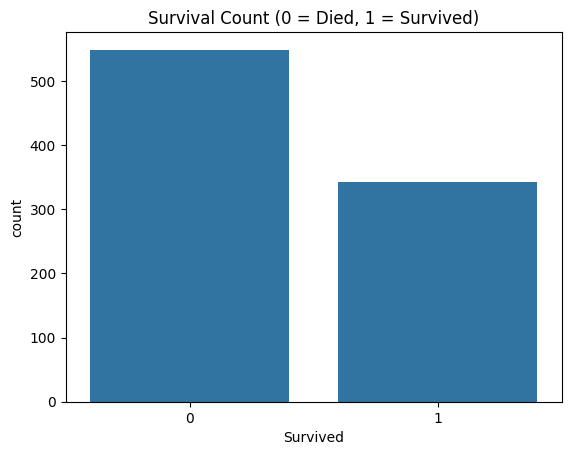

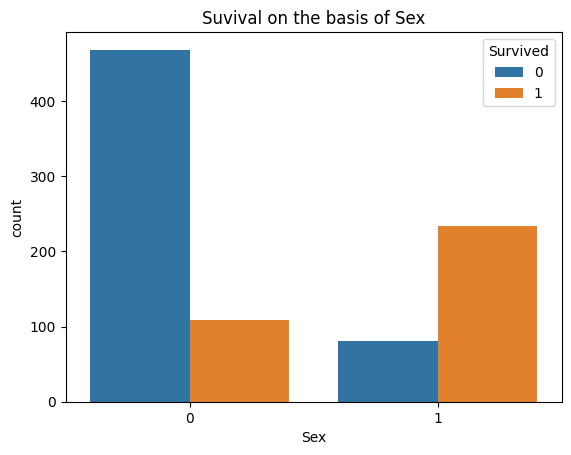

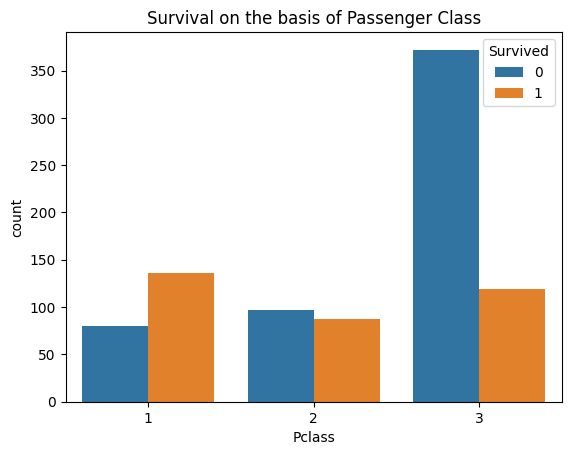

/tmp/ipython-input-3558172087.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['Survived'] == 1], x = 'Age', label = 'Survived', shade = True)
/tmp/ipython-input-3558172087.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['Survived'] == 0], x = 'Age', label = 'Did not Survived', shade = True)


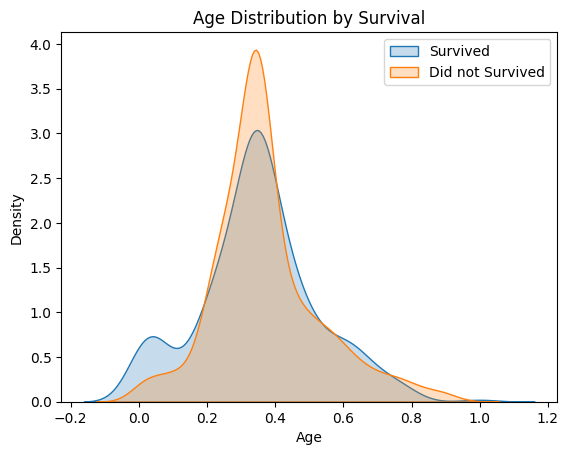

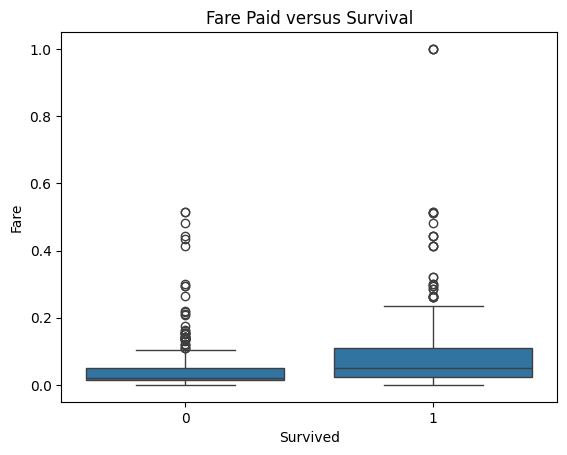

In [14]:
# a. Survival count
sns.countplot(data = df, x = 'Survived')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

# b. Survival on the basis of gender
sns.countplot(data = df, x = 'Sex', hue = 'Survived')
plt.title("Suvival on the basis of Sex")
plt.show()

# c. Survival on the basis of Passenger Class
sns.countplot(data = df, x = 'Pclass', hue = 'Survived')
plt.title("Survival on the basis of Passenger Class")
plt.show()

# d. Age versus Survival using KDE
sns.kdeplot(data = df[df['Survived'] == 1], x = 'Age', label = 'Survived', shade = True)
sns.kdeplot(data = df[df['Survived'] == 0], x = 'Age', label = 'Did not Survived', shade = True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

# e. Fare Paid versus Survival
sns.boxplot(data = df, x = 'Survived', y = 'Fare')
plt.title("Fare Paid versus Survival")
plt.show()